In [1]:
import numpy

In [2]:
numpy.__version__

'1.26.3'

In [3]:
import torch
torch.__version__

'2.4.0+cu121'

In [4]:
import glob
import os
import numpy as np 
import pandas as pd 
import shutil
import yaml
from IPython.display import Image, display

In [5]:
import torch
torch.__version__

'2.4.0+cu121'

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
os.chdir('..')

In [8]:
def extract_file_name(path):
    return path.split("/")[-1].split('.')[0]

In [9]:
import glob
import random
import numpy as np

In [10]:
import glob
import os

# Get the list of files
files = glob.glob('data/raw/*.txt')

# Normalize the paths and convert backslashes to forward slashes
files = [os.path.normpath(file).replace("\\", "/") for file in files]

print(files)

['data/raw/0b86cecf-67d1-4fc0-87c9-b36b0ee228bb.txt', 'data/raw/12c6cb72-3ea3-49e7-b381-e0cdfc5e8960.txt', 'data/raw/1e241dc8-8f18-4955-8988-03a0ab49f813.txt', 'data/raw/21d8c31d-3deb-494b-9c63-c0223306fd82.txt', 'data/raw/22e54a62-57a8-4a0a-88c1-4b9758f67651.txt', 'data/raw/316b64c0-55bf-4079-a1c0-d93f461a576f.txt', 'data/raw/33fa5185-0286-4e8f-b775-46162eba39d4.txt', 'data/raw/37170dd1-2802-4e38-b982-c5d07c64ff67.txt', 'data/raw/3850ba91-3c64-4c64-acba-0c46b61ec0da.txt', 'data/raw/4be2025c-09f7-4bb0-b1bd-8e8633e6dec1.txt', 'data/raw/5b562a61-34ad-4f00-9164-d34abb7a38e4.txt', 'data/raw/7fbfbe28-aecb-45be-bd05-7cf26acb3c5c.txt', 'data/raw/a03ced3f-5a97-4e75-8106-fabfd2b8b76e.txt', 'data/raw/AYO9034.txt', 'data/raw/AZJ6991.txt', 'data/raw/c9368c55-210d-456c-a5ef-c310e60039ec.txt', 'data/raw/car1.txt', 'data/raw/car11.txt', 'data/raw/car12.txt', 'data/raw/car13.txt', 'data/raw/car14.txt', 'data/raw/car15.txt', 'data/raw/car16.txt', 'data/raw/car17.txt', 'data/raw/car18.txt', 'data/raw/ca

In [81]:
import glob
import os

def extract_file_name(file_path):
    return os.path.splitext(os.path.basename(file_path))[0]

# Get list of annotation and image files
annots_path = glob.glob("data/raw/*.txt")
annots_path = [os.path.normpath(file).replace("\\", "/") for file in annots_path]
imgs_path = glob.glob("data/raw/*.jpg")
imgs_path = [os.path.normpath(file).replace("\\", "/") for file in imgs_path]

# Extract base file names (without extensions)
annots_file_names = [extract_file_name(label_path) for label_path in annots_path]
imgs_file_names = [extract_file_name(img_path) for img_path in imgs_path]


In [83]:
data_df = pd.DataFrame({
    "file_name": imgs_file_names,
})

## add column of annots_file_names to data_df only if the file_name is in annots_file_names
data_df["has_labels"] = data_df["file_name"].isin(annots_file_names)

In [86]:
data_df['has_labels'].value_counts()

has_labels
True    444
Name: count, dtype: int64

In [87]:
data_df = data_df[data_df['has_labels']]

In [11]:
import glob
import os

def extract_file_name(file_path):
    return os.path.splitext(os.path.basename(file_path))[0]

# Get list of annotation and image files
annots_path = glob.glob("data/raw/*.txt")
annots_path = [os.path.normpath(file).replace("\\", "/") for file in annots_path]
imgs_path = glob.glob("data/raw/*.jpg")
imgs_path = [os.path.normpath(file).replace("\\", "/") for file in imgs_path]

# Extract base file names (without extensions)
annots_file_names = [extract_file_name(label_path) for label_path in annots_path]
imgs_file_names = [extract_file_name(img_path) for img_path in imgs_path]

# Create dictionaries to map file names to their full paths
annots_dict = {extract_file_name(label_path): label_path for label_path in annots_path}
imgs_dict = {extract_file_name(img_path): img_path for img_path in imgs_path}

# Find common file names
common_file_names = sorted(set(annots_file_names) & set(imgs_file_names))

# Create sorted lists of paths
sorted_annots = [annots_dict[file_name] for file_name in common_file_names]
sorted_imgs = [imgs_dict[file_name] for file_name in common_file_names]

# Ensure the number of annotations matches the number of images
assert len(sorted_annots) == len(sorted_imgs)

# Ensure that they correspond to each other in terms of index
for i in range(len(sorted_annots)):
    annot_file_name = extract_file_name(sorted_annots[i])
    img_file_name = extract_file_name(sorted_imgs[i])
    assert annot_file_name == img_file_name, f"Mismatch at index {i}: {annot_file_name} != {img_file_name}"

print("All images have corresponding annotation files, and they are correctly matched.")

All images have corresponding annotation files, and they are correctly matched.


In [12]:
annots = sorted_annots
imgs = sorted_imgs

In [13]:
# label_id_list = [label.split("/")[-1].split('.txt')[0] for label in annots]
# for i in range(len(imgs)):
#     img_id = imgs[i].split("/")[-1].split('.jpg')[0]
#     if img_id not in label_id_list:
#         print(img_id)

In [14]:
# Shuffle the indices
indices = np.arange(len(imgs))
random.shuffle(indices)

# Define the split ratios
train_ratio = 0.7
val_ratio = 0.15
test_ratio = 0.15

# Calculate the number of samples for each set
num_samples = len(imgs)
num_train = int(train_ratio * num_samples)
num_val = int(val_ratio * num_samples)
num_test = num_samples - num_train - num_val  # Ensure all samples are used

# Split the indices
train_indices = indices[:num_train]
val_indices = indices[num_train:num_train + num_val]
test_indices = indices[num_train + num_val:]

# Separate the files into different sets
train_annots = [annots[i] for i in train_indices]
train_imgs = [imgs[i] for i in train_indices]

val_annots = [annots[i] for i in val_indices]
val_imgs = [imgs[i] for i in val_indices]

test_annots = [annots[i] for i in test_indices]
test_imgs = [imgs[i] for i in test_indices]

# Verify the splits
print(f"Number of training samples: {len(train_annots)}")
print(f"Number of validation samples: {len(val_annots)}")
print(f"Number of testing samples: {len(test_annots)}")

Number of training samples: 310
Number of validation samples: 66
Number of testing samples: 68


## Change Annotation Files strcuture

In [15]:
def normalized_coordinates(width, height, xmin, ymin, xmax, ymax):
    xmin, xmax = xmin / width, xmax / width
    ymin, ymax = ymin / height, ymax/ height

    width = xmax-xmin
    height = ymax-ymin
    x_center = xmin + (width / 2)
    y_center = ymin + (height / 2)

    return x_center, y_center, width, height

def normalized_coordinates_2(width, height, xmin, ymax, lp_width, lp_height):
    xmin, lp_width = xmin / width, lp_width / width
    ymax, lp_height = ymax / height, lp_height/ height
    
    lp_width = lp_width
    lp_height = lp_height
    xcenter = xmin+(lp_width/2)
    ycenter = ymax+(lp_height/2)
    
    return xcenter, ycenter, lp_width, lp_height

In [16]:
# import matplotlib.pyplot as plt
# import cv2

# # Load the JPG image
# image_path = 'data/preprocessed/val/images/test_085.jpg'
# img = cv2.imread(image_path)

# # Display the image
# plt.imshow(img)
# plt.axis('off')  # Hide axes
# plt.show()
# # plt.imshow("data/preprocessed/val/images/test_085.jpg")

In [17]:
from matplotlib import pyplot as plt

In [18]:
from PIL import Image

In [19]:
import os
import shutil

# Define the directory structure
base_dir = "data/preprocessed"
dirs = ['train', 'val', 'test']
sub_dirs = ['images', 'labels']

# Create the directories
for dir_ in dirs:
    for sub_dir in sub_dirs:
        os.makedirs(os.path.join(base_dir, dir_, sub_dir), exist_ok=True)

# Function to copy files to their respective directories
def copy_files(file_list, dest_dir):
    for file in file_list:
        shutil.copy(file, dest_dir)

# Copy the training files
copy_files(train_imgs, os.path.join(base_dir, 'train/images'))
copy_files(train_annots, os.path.join(base_dir, 'train/labels'))

# Copy the validation files
copy_files(val_imgs, os.path.join(base_dir, 'val/images'))
copy_files(val_annots, os.path.join(base_dir, 'val/labels'))

# Copy the testing files
copy_files(test_imgs, os.path.join(base_dir, 'test/images'))
copy_files(test_annots, os.path.join(base_dir, 'test/labels'))

# Verify the splits
print(f"Number of training images: {len(os.listdir(os.path.join(base_dir, 'train/images')))}")
print(f"Number of training labels: {len(os.listdir(os.path.join(base_dir, 'train/labels')))}")
print(f"Number of validation images: {len(os.listdir(os.path.join(base_dir, 'val/images')))}")
print(f"Number of validation labels: {len(os.listdir(os.path.join(base_dir, 'val/labels')))}")
print(f"Number of testing images: {len(os.listdir(os.path.join(base_dir, 'test/images')))}")
print(f"Number of testing labels: {len(os.listdir(os.path.join(base_dir, 'test/labels')))}")

Number of training images: 310
Number of training labels: 310
Number of validation images: 66
Number of validation labels: 66
Number of testing images: 68
Number of testing labels: 68


In [20]:
import os
os.getcwd()

'd:\\Keemet\\Week_5'

In [21]:
import yaml

# Define the base directory and class names
base_dir = "data/preprocessed"
class_names = ['background', 'license plate']

# Function to create a data.yaml file
def create_data_yaml(dir_path, class_names):
    data = {
        'path' : os.getcwd(),
        'train': os.path.join(dir_path, 'train'),
        'val': os.path.join(dir_path, 'val'),
        'test': os.path.join(dir_path, 'test'),
        'nc': len(class_names),
        'names': class_names
    }
    
    with open(os.path.join(dir_path, 'data.yaml'), 'w') as file:
        yaml.dump(data, file, default_flow_style=False)

# Create the data.yaml file
create_data_yaml(base_dir, class_names)

# Verify the data.yaml file content
with open(os.path.join(base_dir, 'data.yaml'), 'r') as file:
    data_yaml_content = yaml.safe_load(file)
    print(data_yaml_content)

{'names': ['background', 'license plate'], 'nc': 2, 'path': 'd:\\Keemet\\Week_5', 'test': 'data/preprocessed\\test', 'train': 'data/preprocessed\\train', 'val': 'data/preprocessed\\val'}


In [22]:
import os
import shutil
from PIL import Image
import yaml

# Function to preprocess annotation files to YOLO format
def preprocess_annotations_yolo(annot_files, output_dir, img_files):
    os.makedirs(output_dir, exist_ok=True)
    
    for annot_file, img_file in zip(annot_files, img_files):
        # Get image dimensions
        with Image.open(img_file) as img:
            width, height = img.size
        
        with open(annot_file, 'r') as file:
            lines = file.readlines()
        
        new_lines = []
        for line in lines:
            values = line.split()
            # Remove the first value (file name)
            values = values[1:-1]
            # Convert to floats
            values = list(map(float, values))
            
            # Original format: [class, xmin, ymin, xmax, ymax]
            class_id = 1
            xmin = values[0]
            ymin = values[1]
            box_width = values[2]
            box_height = values[3]
            
            # Calculate YOLO format values
            x_center, y_center, box_width, box_height = normalized_coordinates_2(width, height, xmin, ymin, box_width, box_height)
#             x_center, y_center, box_width, box_height = xmin, ymin, xmax, ymax
            new_lines.append(f"{class_id} {x_center:.6f} {y_center:.6f} {box_width:.6f} {box_height:.6f}")
        
        # Write the modified annotation to a new file in the output directory
        new_annot_file = os.path.join(output_dir, os.path.basename(annot_file))
        with open(new_annot_file, 'w') as file:
            file.write('\n'.join(new_lines))

# Define the directory for the data/preprocessed annotations
preprocessed_dir = "data/preprocessed"

# Preprocess the annotations and copy them to the respective directories
preprocess_annotations_yolo(train_annots, os.path.join(preprocessed_dir, 'train'), train_imgs)
preprocess_annotations_yolo(val_annots, os.path.join(preprocessed_dir, 'val'), val_imgs)
preprocess_annotations_yolo(test_annots, os.path.join(preprocessed_dir, 'test'), test_imgs)

# Copy the images and the data/preprocessed annotations to their respective directories
def copy_preprocessed_files(img_list, annot_list, img_dest, annot_dest, split_name):
    copy_files(img_list, img_dest)
    copy_files([os.path.join(preprocessed_dir, split_name, os.path.basename(annot)) for annot in annot_list], annot_dest)

copy_preprocessed_files(train_imgs, train_annots, os.path.join(base_dir, 'train/images'), os.path.join(base_dir, 'train/labels'), 'train')
copy_preprocessed_files(val_imgs, val_annots, os.path.join(base_dir, 'val/images'), os.path.join(base_dir, 'val/labels'), 'val')
copy_preprocessed_files(test_imgs, test_annots, os.path.join(base_dir, 'test/images'), os.path.join(base_dir, 'test/labels'), 'test')

# Create the data.yaml file
create_data_yaml(base_dir, class_names)

# Verify the data.yaml file content
with open(os.path.join(base_dir, 'data.yaml'), 'r') as file:
    data_yaml_content = yaml.safe_load(file)
    print(data_yaml_content)

# Verify the splits
print(f"Number of training images: {len(os.listdir(os.path.join(base_dir, 'train/images')))}")
print(f"Number of training labels: {len(os.listdir(os.path.join(base_dir, 'train/labels')))}")
print(f"Number of validation images: {len(os.listdir(os.path.join(base_dir, 'val/images')))}")
print(f"Number of validation labels: {len(os.listdir(os.path.join(base_dir, 'val/labels')))}")
print(f"Number of testing images: {len(os.listdir(os.path.join(base_dir, 'test/images')))}")
print(f"Number of testing labels: {len(os.listdir(os.path.join(base_dir, 'test/labels')))}")

{'names': ['background', 'license plate'], 'nc': 2, 'path': 'd:\\Keemet\\Week_5', 'test': 'data/preprocessed\\test', 'train': 'data/preprocessed\\train', 'val': 'data/preprocessed\\val'}
Number of training images: 310
Number of training labels: 310
Number of validation images: 66
Number of validation labels: 66
Number of testing images: 68
Number of testing labels: 68


In [23]:
!wandb off

W&B offline. Running your script from this directory will only write metadata locally. Use wandb disabled to completely turn off W&B.


In [24]:
# shutil.copy("/kaggle/input/yolov10n_v2/pytorch/lp_tuned/1/best_v10n_2.pt", "")

In [25]:
from ultralytics import YOLOv10

# Load the pre-trained YOLOv10-N model (nano version)
model = YOLOv10("../models/best_v10n_2.pt", verbose=False)

c:\Users\Noor\anaconda3\envs\DL_2\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
c:\Users\Noor\anaconda3\envs\DL_2\Lib\site-packages\ultralytics\nn\tasks.py:733: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals

In [26]:
# import torch

# torch.cuda.empty_cache()

In [27]:
# model.train(data="data/preprocessed/data.yaml", epochs=100, box = 40, batch=16, amp=False)

In [28]:
# import os
# os.chdir('..')

In [69]:
import tempfile

In [71]:
result = model.val(data="data/preprocessed/data.yaml", amp=True)

Ultralytics YOLOv8.1.34 🚀 Python-3.12.4 torch-2.4.0+cu121 CUDA:0 (NVIDIA GeForce RTX 2060, 6144MiB)


val: Scanning D:\Keemet\Week_5\data\preprocessed\val\labels.cache... 66 images, 0 backgrounds, 0 corrupt: 100%|██████████| 66/66 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:21<00:00,  4.25s/it]


                   all         66         66      0.981      0.939      0.991      0.859
         license plate         66         66      0.981      0.939      0.991      0.859
Speed: 1.5ms preprocess, 4.0ms inference, 0.0ms loss, 0.5ms postprocess per image
Results saved to runs\detect\val32


AttributeError: 'DetMetrics' object has no attribute 'files'. See valid attributes below.

    This class is a utility class for computing detection metrics such as precision, recall, and mean average precision
    (mAP) of an object detection model.

    Args:
        save_dir (Path): A path to the directory where the output plots will be saved. Defaults to current directory.
        plot (bool): A flag that indicates whether to plot precision-recall curves for each class. Defaults to False.
        on_plot (func): An optional callback to pass plots path and data when they are rendered. Defaults to None.
        names (tuple of str): A tuple of strings that represents the names of the classes. Defaults to an empty tuple.

    Attributes:
        save_dir (Path): A path to the directory where the output plots will be saved.
        plot (bool): A flag that indicates whether to plot the precision-recall curves for each class.
        on_plot (func): An optional callback to pass plots path and data when they are rendered.
        names (tuple of str): A tuple of strings that represents the names of the classes.
        box (Metric): An instance of the Metric class for storing the results of the detection metrics.
        speed (dict): A dictionary for storing the execution time of different parts of the detection process.

    Methods:
        process(tp, conf, pred_cls, target_cls): Updates the metric results with the latest batch of predictions.
        keys: Returns a list of keys for accessing the computed detection metrics.
        mean_results: Returns a list of mean values for the computed detection metrics.
        class_result(i): Returns a list of values for the computed detection metrics for a specific class.
        maps: Returns a dictionary of mean average precision (mAP) values for different IoU thresholds.
        fitness: Computes the fitness score based on the computed detection metrics.
        ap_class_index: Returns a list of class indices sorted by their average precision (AP) values.
        results_dict: Returns a dictionary that maps detection metric keys to their computed values.
        curves: TODO
        curves_results: TODO
    

In [80]:
shutil.move(str(result.save_dir), "results")

'results\\val32'

In [30]:
result = model.val(data="data/preprocessed/data.yaml")

Ultralytics YOLOv8.1.34 🚀 Python-3.12.4 torch-2.4.0+cu121 CUDA:0 (NVIDIA GeForce RTX 2060, 6144MiB)


val: Scanning D:\Keemet\Week_5\data\preprocessed\val\labels.cache... 66 images, 0 backgrounds, 0 corrupt: 100%|██████████| 66/66 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:09<00:00,  1.91s/it]


                   all         66         66      0.981      0.939      0.991      0.859
         license plate         66         66      0.981      0.939      0.991      0.859
         license plate         66         66      0.981      0.939      0.991      0.859
Speed: 1.0ms preprocess, 3.7ms inference, 0.0ms loss, 0.1ms postprocess per image
Results saved to runs\detect\val29


In [31]:
## Export to Onnx

model.export(format='onnx')

Ultralytics YOLOv8.1.34 🚀 Python-3.12.4 torch-2.4.0+cu121 CPU (Intel Core(TM) i5-9400F 2.90GHz)

PyTorch: starting from 'weights\..\models\best_v10n_2.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 300, 6) (5.5 MB)

ONNX: starting export with onnx 1.16.1 opset 19...
ONNX: export success ✅ 1.0s, saved as 'weights\..\models\best_v10n_2.onnx' (8.9 MB)

Export complete (3.0s)
Results saved to D:\Keemet\Week_5\models
Predict:         yolo predict task=detect model=weights\..\models\best_v10n_2.onnx imgsz=640  
Validate:        yolo val task=detect model=weights\..\models\best_v10n_2.onnx imgsz=640 data=/kaggle/working/preprocessed_annotations/data.yaml  
Visualize:       https://netron.app


'weights\\..\\models\\best_v10n_2.onnx'

In [32]:
# model = YOLOv10("models/best_v10n_2.onnx", verbose=False, task='detect')

In [33]:
# model.val(data="data/data/preprocessed/data.yaml")

In [34]:
'C:\\Users\\Noor\\anaconda3\\envs\\DL_2\\Lib\\site-packages\\cv2\\../../x64/vc14/bin;c:\\Users\\Noor\\anaconda3\\envs\\DL_2;C:\\Users\\Noor\\anaconda3\\envs\\DL_2;C:\\Users\\Noor\\anaconda3\\envs\\DL_2\\Library\\mingw-w64\\bin;C:\\Users\\Noor\\anaconda3\\envs\\DL_2\\Library\\usr\\bin;C:\\Users\\Noor\\anaconda3\\envs\\DL_2\\Library\\bin;C:\\Users\\Noor\\anaconda3\\envs\\DL_2\\Scripts;C:\\Users\\Noor\\anaconda3\\envs\\DL_2\\bin;C:\\Users\\Noor\\anaconda3\\condabin;C:\\Program Files\\NVIDIA\\CUDNN\\v9.2\\bin;C:\\Program Files\\NVIDIA GPU Computing Toolkit\\CUDA\\v12.5\\bin;C:\\Program Files\\NVIDIA GPU Computing Toolkit\\CUDA\\v12.5\\libnvvp;C:\\Program Files (x86)\\Common Files\\Oracle\\Java\\javapath;C:\\Windows\\system32;C:\\Windows;C:\\Windows\\System32\\Wbem;C:\\Windows\\System32\\WindowsPowerShell\\v1.0;C:\\Windows\\System32\\OpenSSH;C:\\Program Files (x86)\\NVIDIA Corporation\\PhysX\\Common;C:\\Program Files\\dotnet;C:\\Program Files\\NVIDIA Corporation\\NVIDIA NvDLISR;C:\\msys64\\mingw64\\bin;C:\\Program Files\\Git\\cmd;C:\\Program Files\\Cloudflare\\Cloudflare WARP;C:\\WINDOWS\\system32;C:\\WINDOWS;C:\\WINDOWS\\System32\\Wbem;C:\\WINDOWS\\System32\\WindowsPowerShell\\v1.0;C:\\WINDOWS\\System32\\OpenSSH;C:\\Program Files\\NVIDIA Corporation\\Nsight Compute 2024.2.1;C:\\Users\\Noor\\AppData\\Local\\Microsoft\\WindowsApps;C:\\Users\\Noor\\.dotnet\\tools;C:\\Users\\Noor\\AppData\\Local\\Programs\\Microsoft VS Code\\bin;D:\\PyCharm Community Edition 2020.3.2\\bin;.;C:\\msys64\\mingw64\\bin;C:\\Users\\Noor\\AppData\\Local\\Programs\\Microsoft VS Code Insiders\\bin'.split(';')


['C:\\Users\\Noor\\anaconda3\\envs\\DL_2\\Lib\\site-packages\\cv2\\../../x64/vc14/bin',
 'c:\\Users\\Noor\\anaconda3\\envs\\DL_2',
 'C:\\Users\\Noor\\anaconda3\\envs\\DL_2',
 'C:\\Users\\Noor\\anaconda3\\envs\\DL_2\\Library\\mingw-w64\\bin',
 'C:\\Users\\Noor\\anaconda3\\envs\\DL_2\\Library\\usr\\bin',
 'C:\\Users\\Noor\\anaconda3\\envs\\DL_2\\Library\\bin',
 'C:\\Users\\Noor\\anaconda3\\envs\\DL_2\\Scripts',
 'C:\\Users\\Noor\\anaconda3\\envs\\DL_2\\bin',
 'C:\\Users\\Noor\\anaconda3\\condabin',
 'C:\\Program Files\\NVIDIA\\CUDNN\\v9.2\\bin',
 'C:\\Program Files\\NVIDIA GPU Computing Toolkit\\CUDA\\v12.5\\bin',
 'C:\\Program Files\\NVIDIA GPU Computing Toolkit\\CUDA\\v12.5\\libnvvp',
 'C:\\Program Files (x86)\\Common Files\\Oracle\\Java\\javapath',
 'C:\\Windows\\system32',
 'C:\\Windows',
 'C:\\Windows\\System32\\Wbem',
 'C:\\Windows\\System32\\WindowsPowerShell\\v1.0',
 'C:\\Windows\\System32\\OpenSSH',
 'C:\\Program Files (x86)\\NVIDIA Corporation\\PhysX\\Common',
 'C:\\Program Fil

In [35]:
import os
os.environ

environ{'ALLUSERSPROFILE': 'C:\\ProgramData',
        'APPDATA': 'C:\\Users\\Noor\\AppData\\Roaming',
        'CHROME_CRASHPAD_PIPE_NAME': '\\\\.\\pipe\\crashpad_5480_URJBPDGALZFIHAZY',
        'COMMONPROGRAMFILES': 'C:\\Program Files\\Common Files',
        'COMMONPROGRAMFILES(X86)': 'C:\\Program Files (x86)\\Common Files',
        'COMMONPROGRAMW6432': 'C:\\Program Files\\Common Files',
        'COMPUTERNAME': 'DESKTOP-RMRJDB0',
        'COMSPEC': 'C:\\WINDOWS\\system32\\cmd.exe',
        'CONDA_ALLOW_SOFTLINKS': 'false',
        'CONDA_DEFAULT_ENV': 'DL_2',
        'CONDA_EXE': 'C:\\Users\\Noor\\anaconda3\\Scripts\\conda.exe',
        'CONDA_PREFIX': 'C:\\Users\\Noor\\anaconda3\\envs\\DL_2',
        'CONDA_PROMPT_MODIFIER': '(DL_2) ',
        'CONDA_PYTHON_EXE': 'C:\\Users\\Noor\\anaconda3\\python.exe',
        'CONDA_ROOT': 'C:\\Users\\Noor\\anaconda3',
        'CONDA_SHLVL': '1',
        'CUDA_PATH': 'C:\\Program Files\\NVIDIA GPU Computing Toolkit\\CUDA\\v12.5',
        'CUDA_PAT

In [36]:
from ultralytics.utils.plotting import Annotator
from PIL import Image

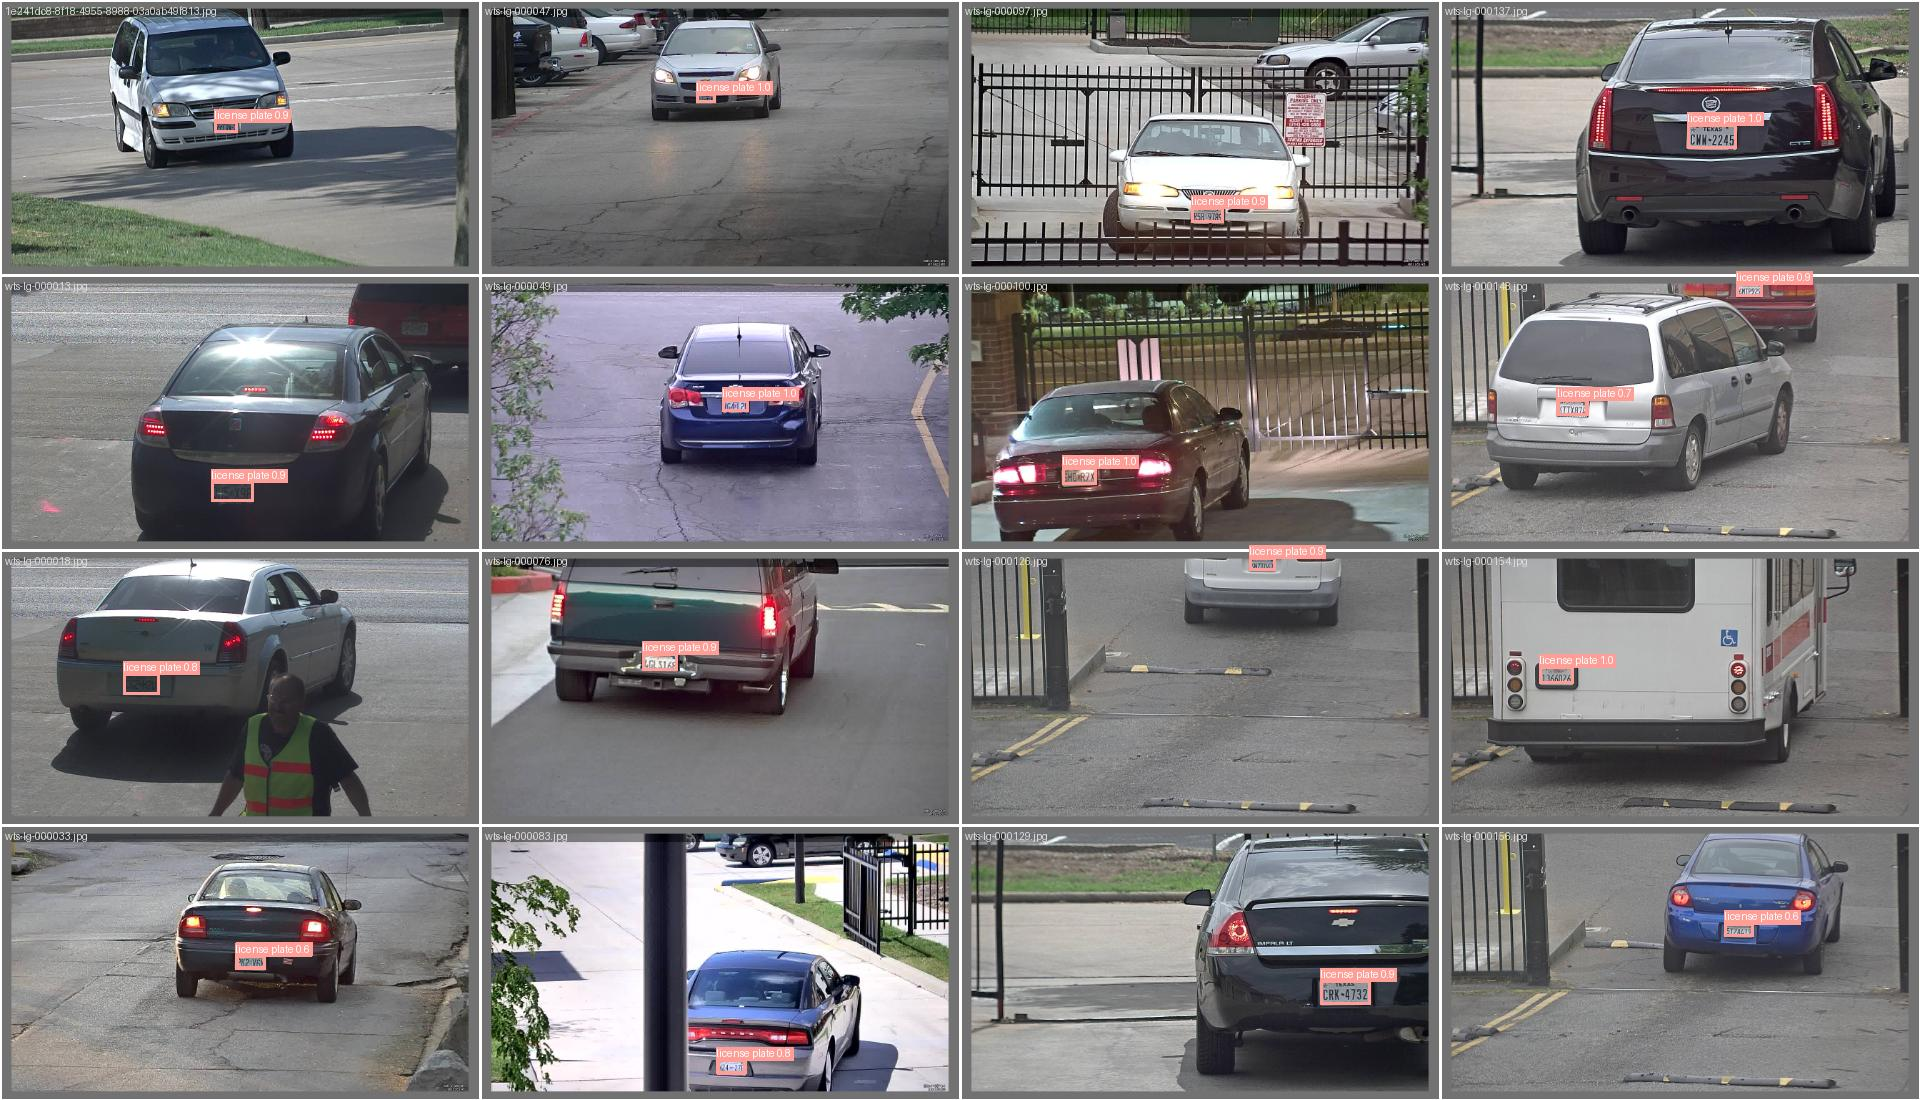

In [37]:
Image.open("runs/detect/val/val_batch0_pred.jpg")

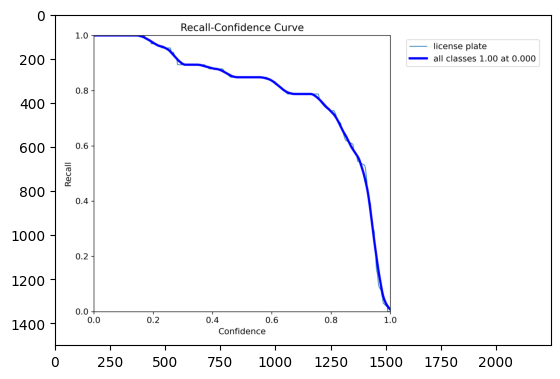

In [38]:
plt.imshow(Image.open("runs/detect/val/R_curve.png"))
plt.show()

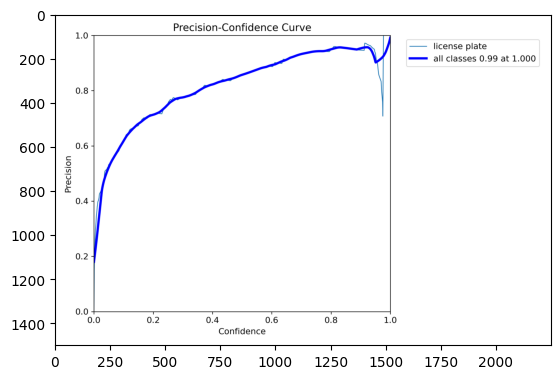

In [39]:
plt.imshow(Image.open("runs/detect/val/P_curve.png"))

In [40]:
def plot_img_w_box(img_path, box):
    img = Image.open(img_path)
    x = Annotator(img)
    x.box_label(box, label="LP", color=(255, 0, 0))
    imgc = x.result()
    plt.clf()
    plt.imshow(imgc)
    plt.show()

In [41]:
def get_label(sample_id):
    with open(f"data/raw/{sample_id}.txt") as file:
        return file.readline().split()[-1]
    
def get_label_path(path):
    with open(path+".txt") as file:
        return file.readline().split()[-1]

In [42]:
sample_id = "PJI5921"
label = get_label(sample_id)
label

'PJI5921'

In [43]:
some_img = Image.open(f"data/raw/{sample_id}.jpg")

In [44]:
def get_bboxes(sample_id):
    image_selected_path = f"data/raw/{sample_id}.jpg"
    image_selected = Image.open(image_selected_path)
    result = model(image_selected)
    return image_selected, result[0].boxes.xyxy[0]

def get_img_bboxes_path(path):
    image_selected_path = path+".jpg"
    image_selected = Image.open(image_selected_path)
    result = model(image_selected, verbose=False)
    return image_selected, result[0].boxes.xyxy[0]


0: 640x640 1 license plate, 16.0ms
Speed: 4.0ms preprocess, 16.0ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


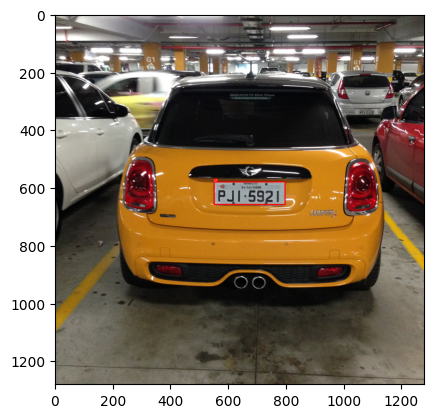

In [45]:
image_selected, bboxes = get_bboxes(sample_id)
image_selected_path = f"data/raw/{sample_id}.jpg"
plot_img_w_box(image_selected_path, bboxes)

In [46]:
def get_cropped(image, bboxes):
    crop_range = list(bboxes.detach().cpu().numpy().astype(int))
    image_np = np.array(image)
    cropped = image_np[crop_range[1]:crop_range[3], crop_range[0]:crop_range[2]]
    return cropped

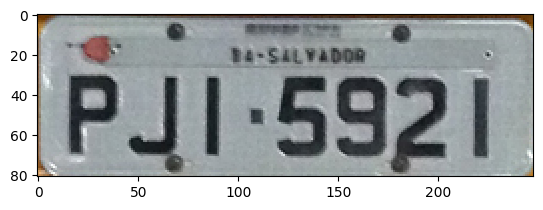

In [47]:
cropped = get_cropped(image_selected, bboxes)
plt.imshow(cropped)

In [48]:
from transformers import TrOCRProcessor, VisionEncoderDecoderModel

# Ensure the transformers library uses tqdm for progress bars
import transformers
transformers.logging.set_verbosity_info()

# Download and load the processor and model with progress bar enabled
processor = TrOCRProcessor.from_pretrained('microsoft/trocr-base-printed')
model_ocr = VisionEncoderDecoderModel.from_pretrained('microsoft/trocr-base-printed')

loading configuration file preprocessor_config.json from cache at C:\Users\Noor\.cache\huggingface\hub\models--microsoft--trocr-base-printed\snapshots\93450be3f1ed40a930690d951ef3932687cc1892\preprocessor_config.json
size should be a dictionary on of the following set of keys: ({'width', 'height'}, {'shortest_edge'}, {'longest_edge', 'shortest_edge'}, {'longest_edge'}, {'max_width', 'max_height'}), got 384. Converted to {'height': 384, 'width': 384}.
Image processor ViTImageProcessor {
  "do_normalize": true,
  "do_rescale": true,
  "do_resize": true,
  "image_mean": [
    0.5,
    0.5,
    0.5
  ],
  "image_processor_type": "ViTImageProcessor",
  "image_std": [
    0.5,
    0.5,
    0.5
  ],
  "resample": 2,
  "rescale_factor": 0.00392156862745098,
  "size": {
    "height": 384,
    "width": 384
  }
}

size should be a dictionary on of the following set of keys: ({'width', 'height'}, {'shortest_edge'}, {'longest_edge', 'shortest_edge'}, {'longest_edge'}, {'max_width', 'max_height'}), 

In [49]:
def get_LP(cropped):
    pixel_values = processor(images=cropped, return_tensors="pt").pixel_values
    generated_ids = model_ocr.generate(pixel_values)
    generated_text = processor.batch_decode(generated_ids, skip_special_tokens=True)[0]
    return generated_text

In [50]:
generated_text = get_LP(cropped)

In [51]:
generated_text

'PJI-5921'

In [52]:
import jiwer

def character_error_rate(ground_truth, prediction):
    return jiwer.cer(ground_truth, prediction)

cer = character_error_rate(label, generated_text)
print(f"Character Error Rate (CER): {cer:.2f}")

Character Error Rate (CER): 0.14


In [53]:
import pandas as pd

df = pd.DataFrame(annots_path, columns=['path'])

In [54]:
df['path'] = df['path'].apply(lambda x: ''.join(x.split('.')[:-1]))

In [55]:
df

path
0    data/raw/0b86cecf-67d1-4fc0-87c9-b36b0ee228bb
1    data/raw/12c6cb72-3ea3-49e7-b381-e0cdfc5e8960
2    data/raw/1e241dc8-8f18-4955-8988-03a0ab49f813
3    data/raw/21d8c31d-3deb-494b-9c63-c0223306fd82
4    data/raw/22e54a62-57a8-4a0a-88c1-4b9758f67651
..                                             ...
439                         data/raw/wts-lg-000194
440                         data/raw/wts-lg-000195
441                         data/raw/wts-lg-000196
442                         data/raw/wts-lg-000197
443                         data/raw/wts-lg-000199

[444 rows x 1 columns]

In [56]:
os.getcwd()

'd:\\Keemet\\Week_5'

In [57]:
# df['path'] = df['path'].apply(lambda x: x[1:])

In [58]:
df['LP_GT'] = df['path'].apply(get_label_path)

In [59]:
df['LP_GT'].duplicated().sum()

13

In [60]:
from torch.amp import autocast

def pipeline(path):
    with autocast('cuda'):
        with torch.no_grad():
            try:
                image, bboxes = get_img_bboxes_path(path)
            except IndexError:
                return ""
            cropped = get_cropped(image, bboxes)
            recognizedLP = get_LP(cropped)
    return recognizedLP

In [66]:
# ## export isntalled libaries

# !pip freeze > requirements.txt

In [61]:
from tqdm import tqdm
predicted = []

for i, k in tqdm(df.iterrows(), total=len(df)):
    predicted.append(pipeline(k[0]))

  0%|          | 0/444 [00:00<?, ?it/s]C:\Users\Noor\AppData\Local\Temp\ipykernel_18140\3336394679.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  predicted.append(pipeline(k[0]))
 28%|██▊       | 123/444 [06:20<16:31,  3.09s/it]
Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x0000021A6BAA65C0>
Traceback (most recent call last):
  File "c:\Users\Noor\anaconda3\envs\DL_2\Lib\site-packages\torch\utils\data\dataloader.py", line 1477, in __del__
  File "c:\Users\Noor\anaconda3\envs\DL_2\Lib\site-packages\torch\utils\data\dataloader.py", line 1441, in _shutdown_workers
  File "c:\Users\Noor\anaconda3\envs\DL_2\Lib\multiprocessing\process.py", line 149, in join
  File "c:\Users\Noor\anaconda3\envs\DL_2\Lib\multiprocessing\popen_spawn_win32.py", line 112, in wait
KeyboardInter

KeyboardInterrupt: 

In [ ]:
# df['predicted'] = df['path'].apply(pipeline)

In [ ]:
df['pred'] = predicted

In [ ]:
df['cer'] = df.apply(lambda row: character_error_rate(row['LP_GT'], row['pred']), axis=1)


In [ ]:
df

In [ ]:
df['cer'].mean()

In [ ]:
df['pred'].value_counts()

In [ ]:
model.export(format="onnx", half=False)

In [ ]:
model = YOLOv10("best_v10n_2.onnx", task='detect')

In [ ]:
result = model.val(data="data/preprocessed/data.yaml")